# Lec 08A: The RNN layer


In this practical, we shall learn two different ways to use the RNN layer. We shall mainly perform inference using an RNN layer. We shall learn how to use the layer to build an RNN network in the second part of this lab.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

---
## 1. Creating a RNN layer


In this section, you shall take a look at how the PyTorch RNN layer really works in practice by instantiating an RNN layer and see the dimensions of the tensors of the input and output.

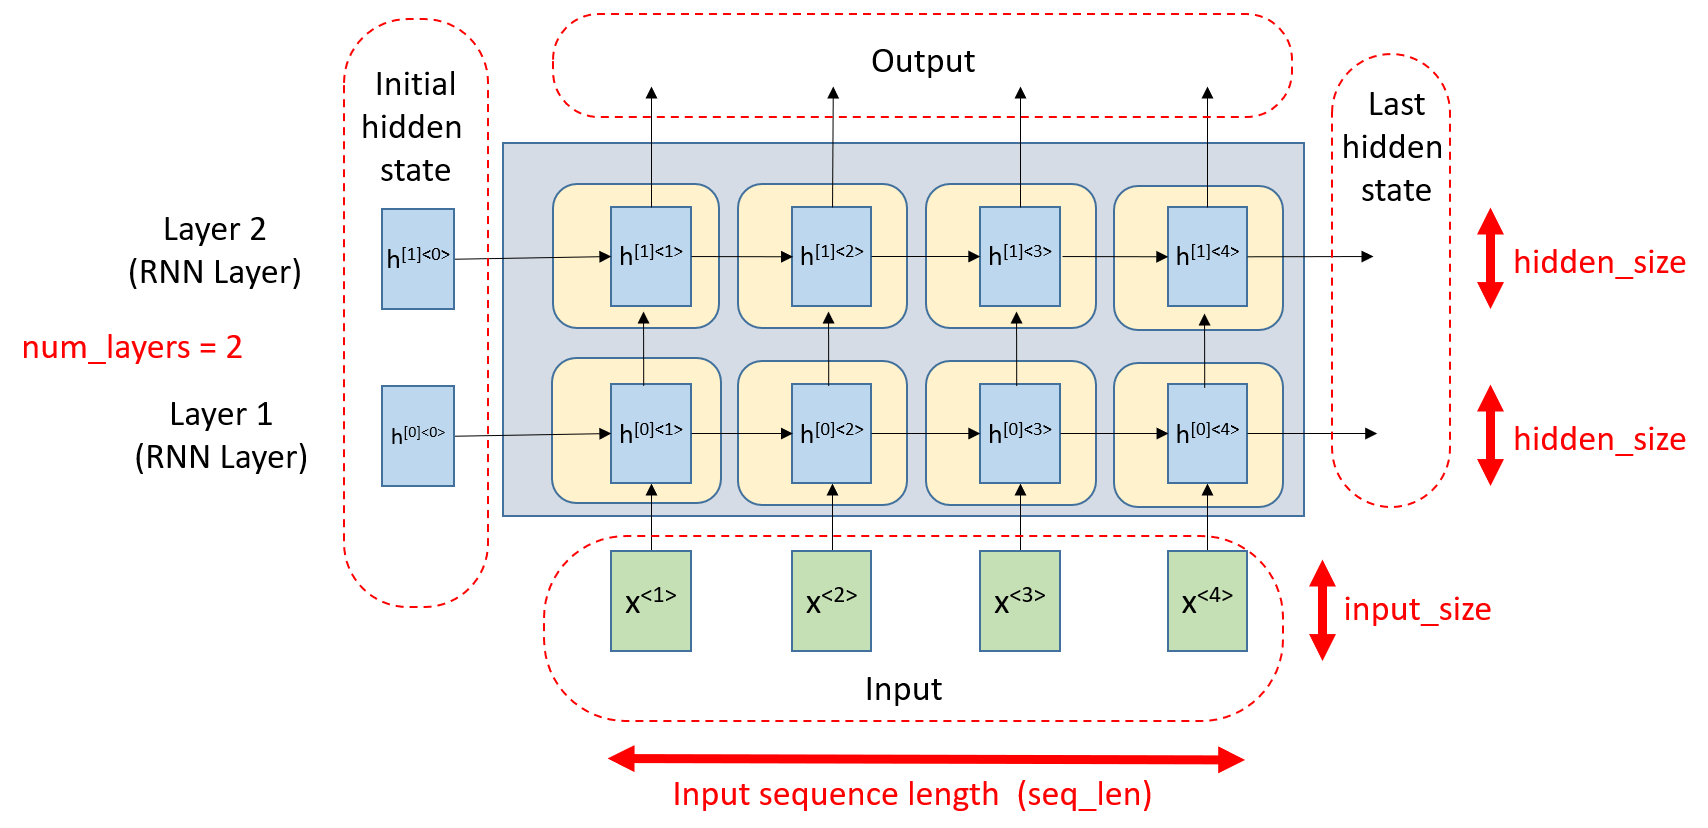

### The `torch.nn.RNN` module 

Reference: [torch.nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)

```
output = torch.nn.RNN(input_size, hidden_size, num_layers, batch_first, bidirectional)
```

* Parameters:
    * **input_size** – The number of features in an input token $x^{<t>}$ at time step $t$. 
    * **hidden_size** – The number of features in the hidden state $h^{<t>}$ at time step $t$.
    * **num_layers** – Number of recurrent layers. E.g., setting `num_layers=2` would mean stacking two RNN layers, with the second RNN layer taking the outputs of the first RNN layer and computing the final results. Default: 1
    * **batch_first** – If `True`, then the input and output tensors are provided as `(batch, seq, feature)`. Default: `False`
    * **bidirectional** – If `True`, becomes a bidirectional RNN. Default: `False`
    

* Inputs: X, h_0
    * **X** is the batch sequence data input. It has a shape of  `(seq_len, batch, input_size)` when `batch_first = False` (default) or `(batch, seq, feature)` when `batch_first = True`. 
    * **h_0** of shape `(num_layers*num_directions, batch, hidden_size)`: tensor containing the initial hidden state for each element in the batch. If the RNN is bidirectional, num_directions shoudl be 2, else it should be 1.

* Outputs: output, (h_n, c_n)
    * **out** of shape `(seq_len, batch_num, num_directions*hidden_size)`: tensor containing the output features from the last layer of the RNN for each $t$. 
    * **h_n** of shape `(num_layers*num_directions, batch, hidden_size)`: hidden state for the last time step $t$ = `seq_len`

### Input Format for the RNN layer

There are two input format for the RNN layer:

| `batch_first` | Shape of the input matrix | Description |
|:---:|:---:|:---:|
| `False` | `(seq_len, batch_size, input_size)` | (seq, batch, fea) |
| `True` |  `(batch_size, seq_len, input_size)` | (batch, seq, fea) |

* The sequence first configuration (`batch_first=False`) defines *time* as the first dimension. Implementing a `for` loop on the seq-first data allows us to process all samples concurrently one time step at a time.
* The batch first configuration (`batch_first=True`) defines the *batch sample* as the first dimension. Implementing a `for` loop on the batch-first  data allows us to process one sample at a time for all time steps.

### Creating RNN

Create an RNN layer with the following settings:
* the hidden size `hidden_size` is set to 64 units 
* the number of layers `num_layers` = 1
* the layer is uni-directional `bidirectional` = `False`
* the layer accepts input samples with input dimension `input_size=128`. 
* Uses `batch_first` = `False` (default setting)

In [ ]:
# ...

When you create an RNN layer, it is **not** necessary to specify the **sequence length**. The RNN layer can handle different batch data with different sequence length. However, all samples within the same batch must have the same sequence length.

## 2. Simple Inference with RNN

### Creating the input

Since we set `batch_first=False`, the input is a tensor of shape `(inseq_len, batch_size, input_size)`. To test the code, we generate some dummy input to test our RNN layer. In the following, create a dummy input with a *batch size* 4 and *input sequence length* 5.

In [ ]:
# ...

### Initializing hidden state

By default, the input to the first hidden state `h_0` is reset to all 0s. We can also initialize `h_0` through the 2nd argument. For uni-directional RNN, `h_0` has the shape `(num_layers, batch_size, hidden_size)`. 

In [ ]:
# ...

### Performing inference

The rnn layer receives the `X` and `h_0` (optional) as input and then outputs `out` and `h_n`. 
* The shape of `out` is `(seq_len, batch_size, hidden_size)` because of the `batch_first` = `False` setting. 
* The shape of `h_n` is `(num_layers, batch_size, hidden_size)`.

In [ ]:
# ...

## Input with different time sequence

The model can accept input sequence of different length.

Consider inseq_len = 20

In [ ]:
# ...

Consider inseq_len = 30

In [ ]:
# ...

Consider inseq_len = 50

In [ ]:
# ...

---

## Exercise

1. Create the RNN layer for the following image. 
    * Use `batch first = True` and `bidirectional = True`.
    * Sample a random input sequence `X` with `batch size` = 16 and input sequence length `seq_len` = 25 from a normal distribution (`torch.randn`). 
    * Sample the initial state `h_0` from a normal distribution (`torch.randn`)  
    * Perform the inference with the generated random input
    * Lastly, print the shape of the (1) generated output sequence `out` and (2) last output hidden state `h_n`.

Notes: for *bidrectional* RNN, the shape of the following tensors will change:
* hidden states (`h_0` and `h_n`): <br> `(num_layers, batch_size, hidden_size)` for unidirectional RNN $\rightarrow$ `(num_layers*2, batch_size, hidden_size)` for bidirectional RNN
* output: <br> `(batch_size, seq_len, hidden_size)` for unidirectional RNN $\rightarrow$ `(batch_size, seq_len, hidden_size*2)` for bidirectional RNN.


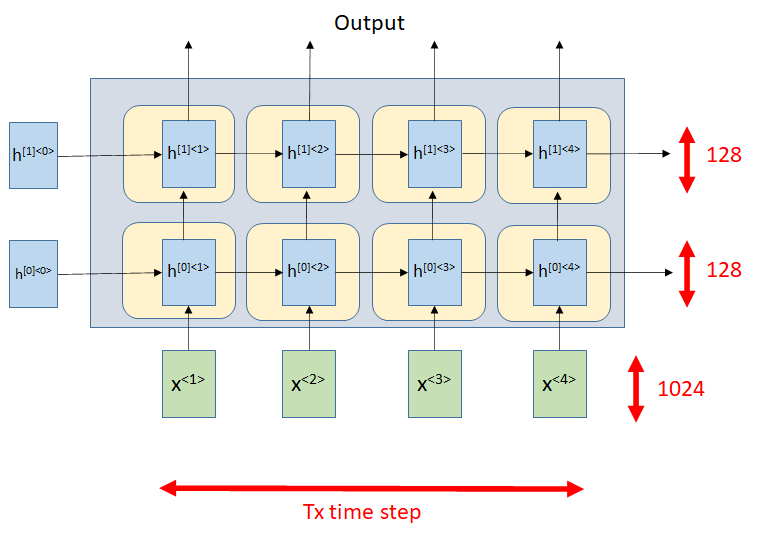

In [ ]:
# ...